### Wine Quality Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv("data/WineQT.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Checking if any of the column contains NaN values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
# normalizing

# Id is not a predictive value
df = df.drop(columns = "Id")

duplicate = df.drop(columns = "quality")
id_column = df["quality"]

min_value = duplicate.min()
max_value = duplicate.max()

normalized  = (duplicate - min_value) / (max_value - min_value)

normalized

# df.loc[: , df.columns!="quality"] = duplicate

# df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1138,0.150442,0.267123,0.13,0.095890,0.106845,0.417910,0.120141,0.416300,0.535433,0.251497,0.400000
1139,0.194690,0.342466,0.08,0.068493,0.093489,0.402985,0.113074,0.472834,0.535433,0.293413,0.169231
1140,0.141593,0.328767,0.08,0.075342,0.130217,0.462687,0.134276,0.354626,0.559055,0.149701,0.323077
1141,0.115044,0.294521,0.10,0.089041,0.083472,0.567164,0.159011,0.370778,0.614173,0.257485,0.430769


In [6]:
# descriptive analysis
df.loc[: , df.columns != "quality"].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


***Data Filteration***


**Filter wines with citric acid content greater than 0.5 and fixed acidity less than 7.**

**This helps extract wines that are both acidic and citrusy.**

In [8]:
mask = (df["citric acid"] > 0.5) & (df["fixed acidity"] < 7)

filtered_data = df[mask]

filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1118,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1122,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


**Get wines that have a quality rating of 7 or more and alcohol greater than 10.**

**Good-quality, stronger wines.**

In [9]:
mask = (df["quality"] >= 7 ) & (df["alcohol"] > 10)

filtered_data = df[mask]

filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
89,8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.50,7
143,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.30,7
145,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7
146,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1096,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70,7
1100,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1104,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1108,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


#### Visualization :

**Alcohol content vs Quality**

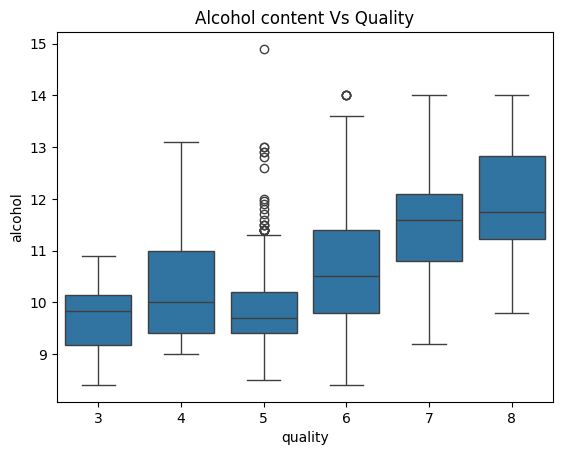

In [10]:
# taking out the columns for x - y axis
alcohol = df["alcohol"]
quality = df["quality"]

# plotting
sns.boxplot(x = quality , y = alcohol)
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.title("Alcohol content Vs Quality")
plt.show()

In [11]:
# checking the alcohol content that is less than 9 and higher 8 (out of the box)

df[(df["alcohol"] > 8 )& (df["alcohol"] < 9)]["alcohol"]

263     8.7
368     8.4
388     8.4
1023    8.5
1051    8.8
1053    8.8
Name: alcohol, dtype: float64

In [12]:
# checking the outliers shown in the plot

Q1 = df["alcohol"].quantile(0.25)
Q3 = df["alcohol"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["alcohol"] < Q1 - 1.5 * IQR )| (df["alcohol"] > Q3 + 1.5 * IQR )]["alcohol"]

outliers

96      14.000000
98      14.000000
329     14.000000
419     14.000000
462     14.900000
589     14.000000
787     13.600000
799     13.600000
868     13.600000
898     14.000000
1052    13.566667
1054    13.600000
Name: alcohol, dtype: float64

#### Visualization :

**pH vs Quality**

Ideal pH level : 3.1 - 3.5


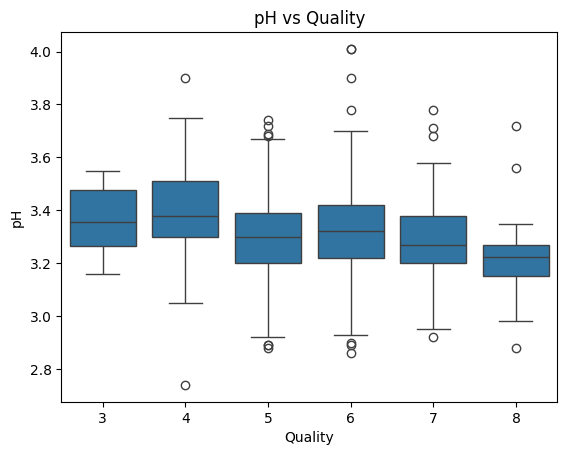

In [13]:
# taking pH column quality was already initialized
pH = df["pH"]

# plotting
sns.boxplot(x = quality , y = pH)
plt.title("pH vs Quality")
plt.xlabel("Quality")
plt.ylabel("pH")
print("Ideal pH level : 3.1 - 3.5")
plt.show()

In [14]:
# outliers 

Q1 = df["pH"].quantile(0.25)
Q3 = df["pH"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["pH"] < Q1 - 1.5 * IQR ) | (df["pH"] > Q3 + 1.5 * IQR)]["pH"]

outliers.sort_values(ascending = False)

933     4.01
935     4.01
32      3.90
493     3.90
785     3.78
923     3.78
66      3.75
396     3.74
419     3.72
1063    3.72
589     3.71
898     3.70
934     2.90
714     2.89
461     2.89
466     2.89
1047    2.88
310     2.88
388     2.86
103     2.74
Name: pH, dtype: float64

**Starting with visualization for all the outliers**

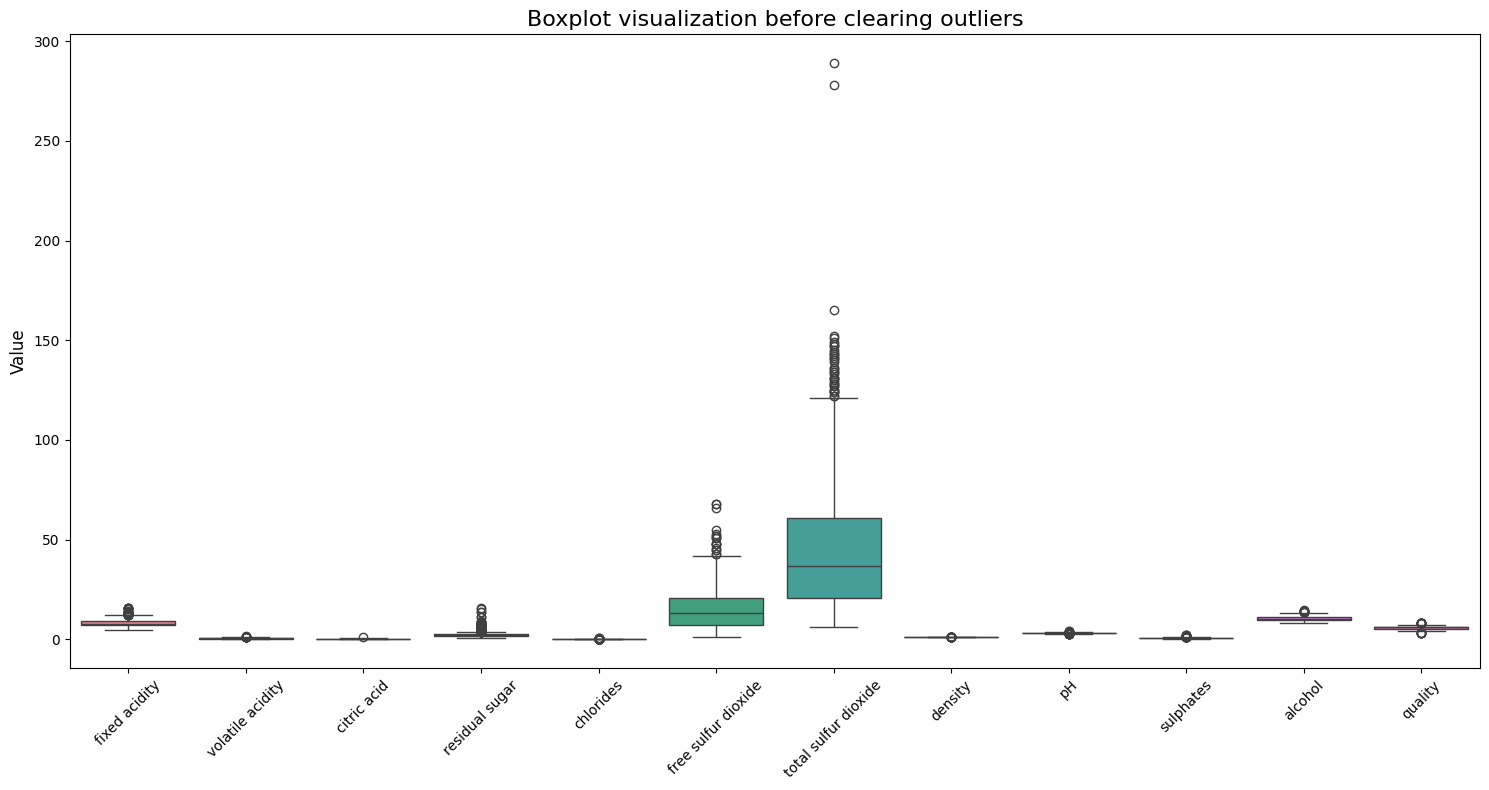

In [15]:
# before clearing outliers

numeric_columns = df.select_dtypes(["int64" , "float64"]).columns

plt.figure(figsize = (15,8))

sns.boxplot(data = df[numeric_columns])

plt.title("Boxplot visualization before clearing outliers" ,fontsize = 16)
plt.ylabel("Value" , fontsize = 12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

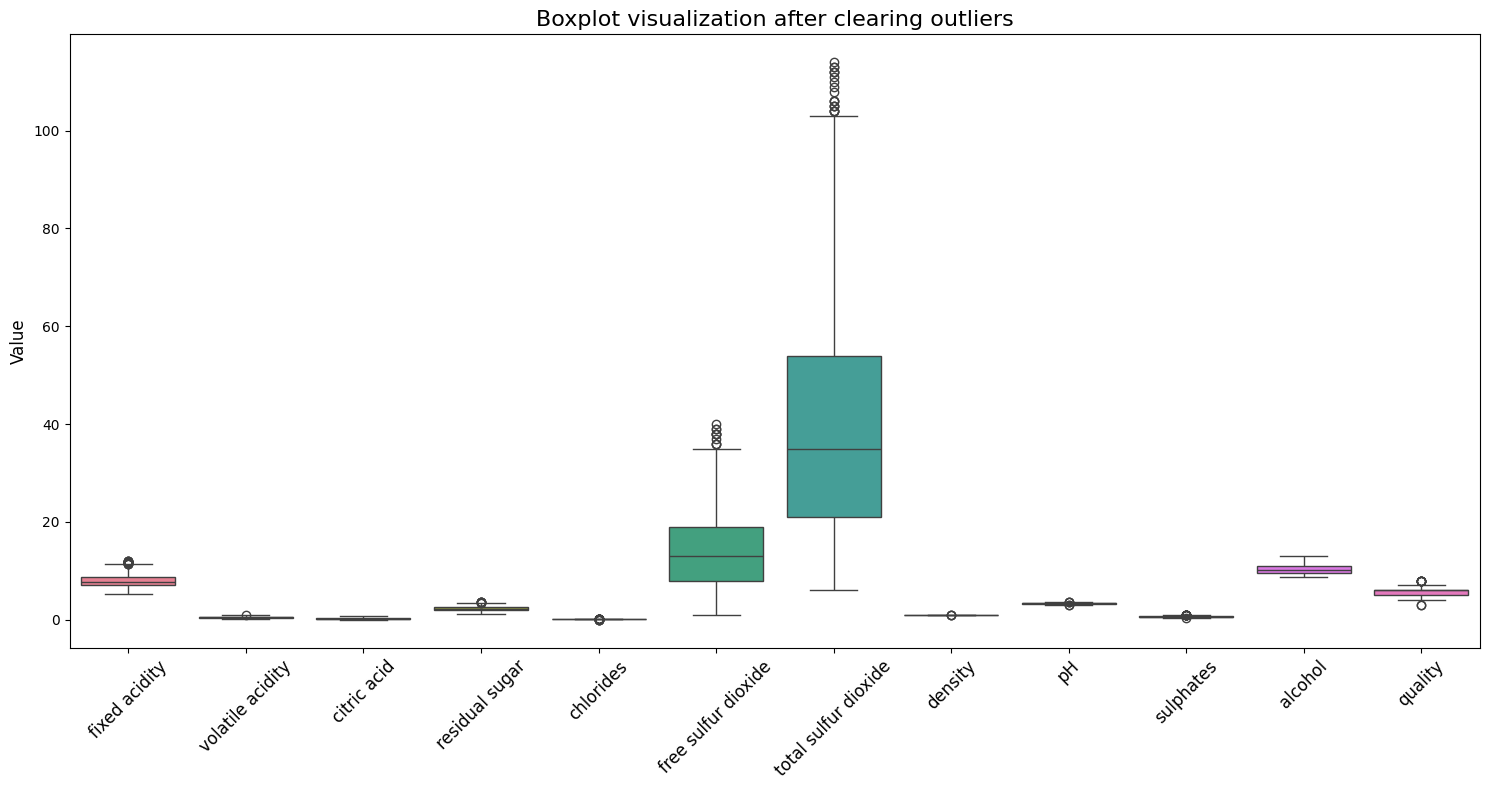

In [16]:
# clearing the outliers

numeric_columns = df.select_dtypes(include = ["int64" , "float64"]).columns.drop("quality")

def remove_outliers(data ,cols):

    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # IQR 
        IQR = Q3 - Q1
    
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        data = data[ (data[col] >= lower) & (data[col] <= upper)] # for keeping the values that are not outliers
    
    return data

cleaned_df = remove_outliers(df.copy() , numeric_columns)

plt.figure(figsize = (15,8))
sns.boxplot(data = cleaned_df)
plt.title("Boxplot visualization after clearing outliers" ,fontsize = 16)
plt.ylabel("Value" , fontsize = 12)
plt.xticks(rotation=45 , fontsize = 12)
plt.tight_layout()
plt.show()

In [17]:
cleaned_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# correlation matrix 
correlation_matrix = cleaned_df.corr()

correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.260597,0.626022,0.246427,0.181348,-0.168516,-0.079136,0.597577,-0.685248,0.186187,-0.037633,0.139166
volatile acidity,-0.260597,1.000000,-0.627802,0.010151,0.125171,0.001781,0.101781,0.046319,0.190522,-0.365188,-0.232186,-0.378748
citric acid,0.626022,-0.627802,1.000000,0.181582,0.076202,-0.082811,-0.001641,0.279207,-0.439242,0.296841,0.156290,0.264726
residual sugar,0.246427,0.010151,0.181582,1.000000,0.219371,0.052864,0.157148,0.391259,-0.045917,0.053852,0.133499,0.028237
chlorides,0.181348,0.125171,0.076202,0.219371,1.000000,0.029286,0.212745,0.397540,-0.150633,-0.069094,-0.291394,-0.169706
free sulfur dioxide,-0.168516,0.001781,-0.082811,0.052864,0.029286,1.000000,0.625263,-0.035287,0.132038,0.063692,-0.019995,-0.013432
total sulfur dioxide,-0.079136,0.101781,-0.001641,0.157148,0.212745,0.625263,1.000000,0.167166,0.015282,-0.079932,-0.270426,-0.200220
density,0.597577,0.046319,0.279207,0.391259,0.397540,-0.035287,0.167166,1.000000,-0.198254,0.095980,-0.527875,-0.198820
pH,-0.685248,0.190522,-0.439242,-0.045917,-0.150633,0.132038,0.015282,-0.198254,1.000000,-0.002355,0.128641,-0.080344
sulphates,0.186187,-0.365188,0.296841,0.053852,-0.069094,0.063692,-0.079932,0.095980,-0.002355,1.000000,0.263329,0.443144


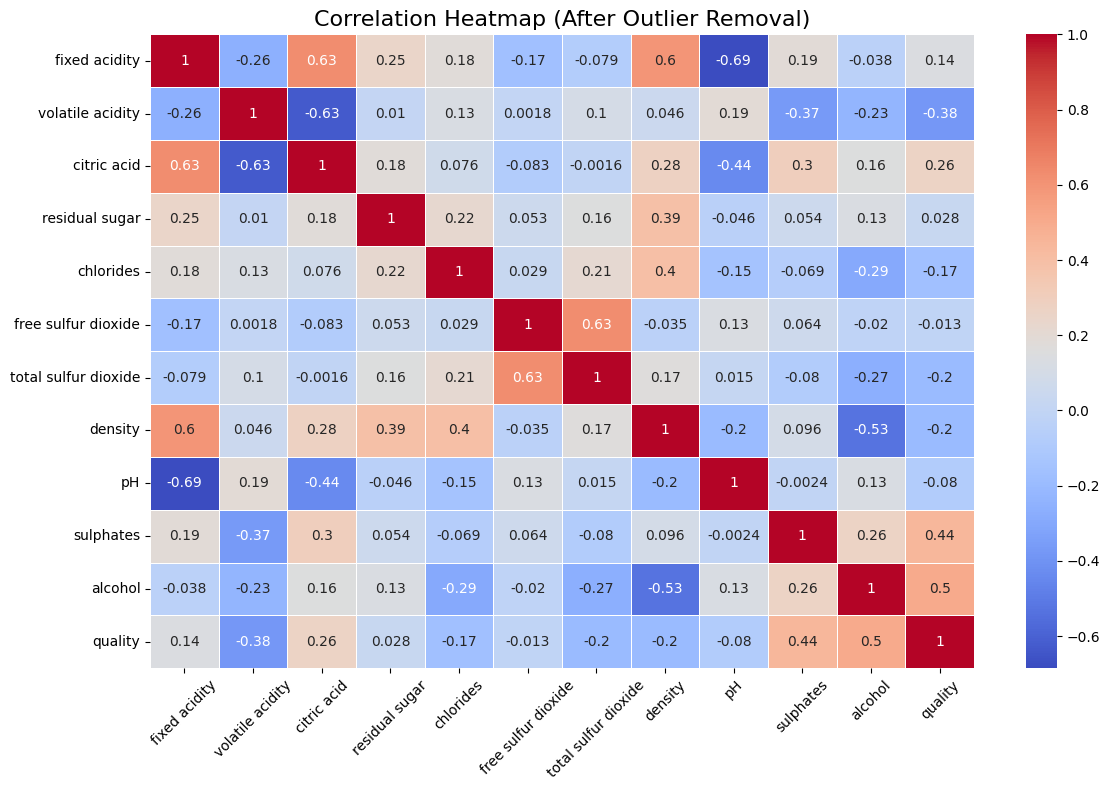

In [19]:
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix , annot = True , cmap = "coolwarm" , linewidths = 0.5)
plt.title("Correlation Heatmap (After Outlier Removal)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# splitting train and test 

x = cleaned_df.drop("quality" , axis = 1)
y = cleaned_df['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [21]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(797, 11)
(637, 11)
(160, 11)
(797,)
(637,)
(160,)


In [22]:
# model
model = LogisticRegression()
model.fit(x_train , y_train)

c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(x_test)
print("Accuracy : " , metrics.accuracy_score( y_test , y_pred) )

Accuracy :  0.89375


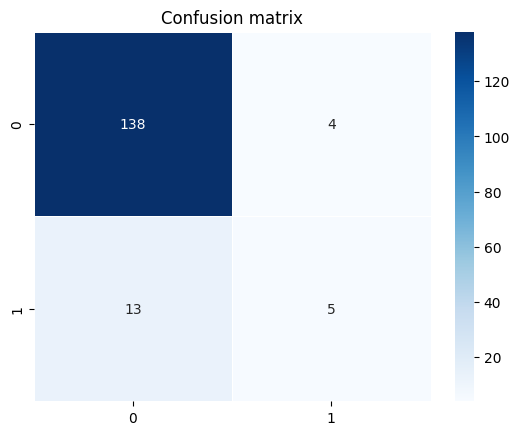

[[138   4]
 [ 13   5]]


In [24]:
plt.title("Confusion matrix")
sns.heatmap(metrics.confusion_matrix(y_test , y_pred) , fmt = "d" ,annot = True , cmap = "Blues" , linewidth = 0.5)
plt.show()
print(metrics.confusion_matrix(y_test , y_pred))

In [25]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       142
           1       0.56      0.28      0.37        18

    accuracy                           0.89       160
   macro avg       0.73      0.62      0.66       160
weighted avg       0.87      0.89      0.88       160



In [26]:
# Sample manual data
manual_data = np.array([[7.2, 0.29, 0.40, 2.1, 0.045, 32.0, 100.0, 0.9942, 3.28, 0.75, 12.9]])

# Predict
prediction = model.predict(manual_data)

print("Predicted Quality:", "High" if prediction[0] == 1 else "Low")

Predicted Quality: Low


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
